# Project : Predict The Medical Cost of Insurance Bills of Patients in Hospital

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Con">Conclusions</a></li>
<li><a href="#Rec">Recommendations</a></li>
<li><a href="#Ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction


For this guided project, we'll be looking at the Medical Cost Data Set from Kaggle. This dataset contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of the person who received it.

For our regression problem, we're interested in how these different characteristics relate to the total medical cost. It's a continuous, positive number, which makes it a good candidate for a linear regression. For this guided project, we want to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population

<a id='wrangling'></a>
## Data Wrangling

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in the data
insurance=pd.read_csv('insurance.csv')

### Assess Data

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#get the dimension of the data
insurance.shape

(1338, 7)

In [5]:
#display the data types
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#check for null values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#check for duplicate values
insurance.duplicated().sum()

1

In [8]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
#get the frequency of the categorical columns
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
#get the frequency of the categorical columns
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
#get the frequency of the categorical columns
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
#get the frequency of the categorical columns
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Data Cleaning

In [13]:
insurance['smoker']=insurance['smoker'].astype('category')

In [14]:
insurance.dtypes

age            int64
sex           object
bmi          float64
children       int64
smoker      category
region        object
charges      float64
dtype: object

In [15]:
insurance.to_csv('induranceclean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1( What is the Distribution of Individual ages of Patients?)

In [17]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the summary statistics, minimum age of patients is 18, maximum age is 64, 25% of persons in the entire population are below 27, 50% are below 39 and 75% are below 51. The standard deviation of Ages of persons who received medical insurance bills being 14 does not really show closeness between the ages of each peson nor too much differences in their ages. Obviously the Bmi of each person is not far from each other looking at its standard deviation being 1.205493.   
Looking at the Summary statistices of the charges of each person that got medical insurance bills, it is seen that the maximum charges is quite far or say higher than the 75% charges. Hence i will explore further to see the distribution of Some interesting variables like "Charges".

In [18]:
insurance['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

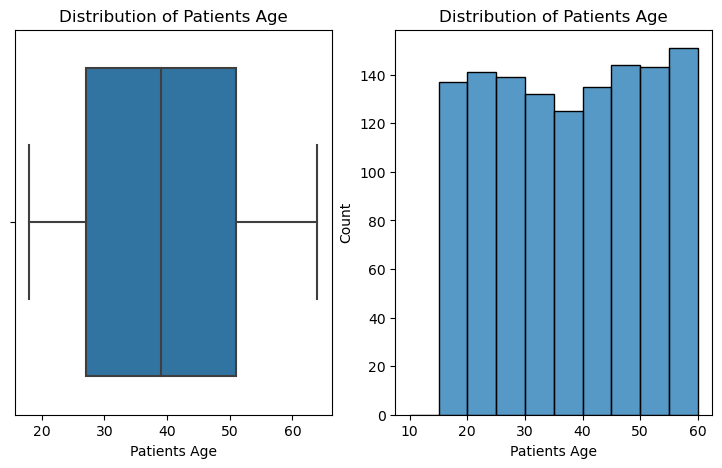

In [19]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
sns.boxplot(data=insurance, x='age')
plt.xlabel('Patients Age')
plt.title('Distribution of Patients Age')

plt.subplot(1,2,2)
base_color=sns.color_palette()[0]
binsize=np.arange(10, insurance['age'].max(), 5)
sns.histplot(data=insurance, x='age', color=base_color, bins=binsize)
plt.xlabel('Patients Age')
plt.title('Distribution of Patients Age');

### Question 2 (What is the distribution of the Charges of Persons who got medical insurance bills?)

In [20]:
insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

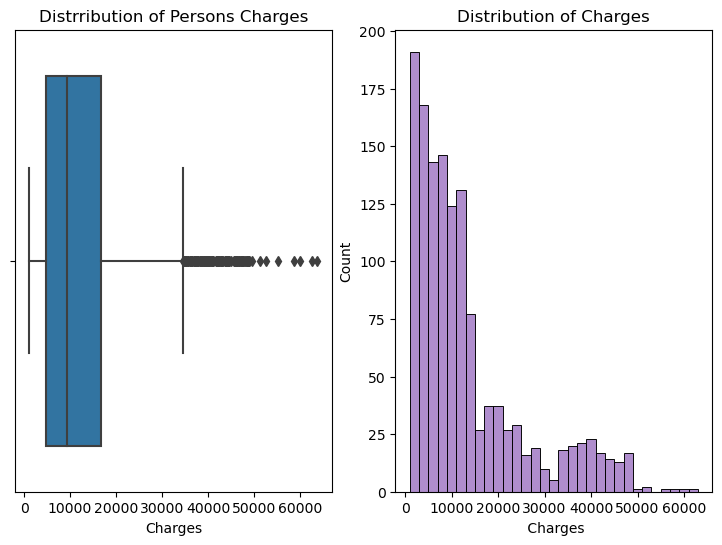

In [21]:
plt.figure(figsize=[9,6])

plt.subplot(1,2,1)
sns.boxplot(data=insurance, x='charges', color=base_color)
plt.xlabel('Charges')
plt.title('Distrribution of Persons Charges')


plt.subplot(1,2,2)
binsize=np.arange(1000, insurance['charges'].max(),  2000)
base_color=sns.color_palette()[4]
sns.histplot(data=insurance, x='charges', color=base_color, bins=binsize)
plt.xlabel(' Charges')
plt.title('Distribution of Charges');

### Bivariate Analysis


### Question 3(What is the Count of Males and Feamles from each Region who got medical Insurance bills?)

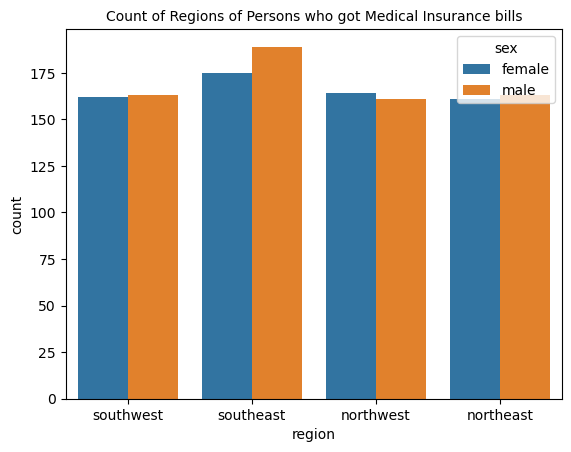

In [22]:
sns.countplot(data=insurance ,  x='region', hue='sex')
plt.title('Count of Regions of Persons who got Medical Insurance bills', fontsize=10);

Persons who are from the southeast region have the highest number of males and females. With more males than females. The southwest, northwest and northeast region have a very little number of difference between number of males and females. Hence i can say that the population of males is more than females but i will explore further to see this .

In [23]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

### Question 4(What is the relationship between the Bmi and Charges of Persons who got medical insurance bills?)

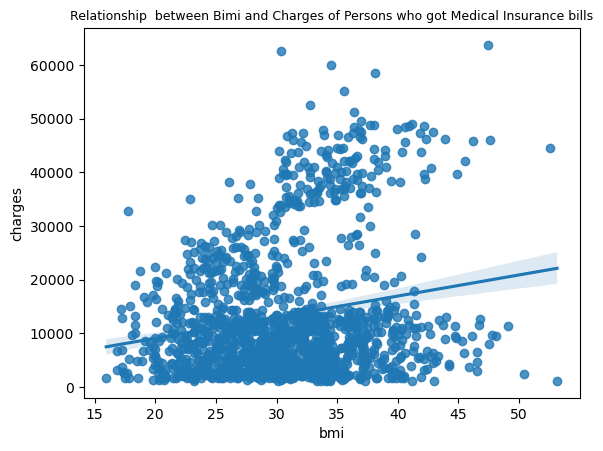

In [24]:
sns.regplot(data=insurance, x='bmi', y='charges')
plt.title('Relationship  between Bimi and Charges of Persons who got Medical Insurance bills',
         fontsize=9);

In [25]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Question 5 (What is the Relationship between the Charges of persons who got medical insurance bills and are smokers?)

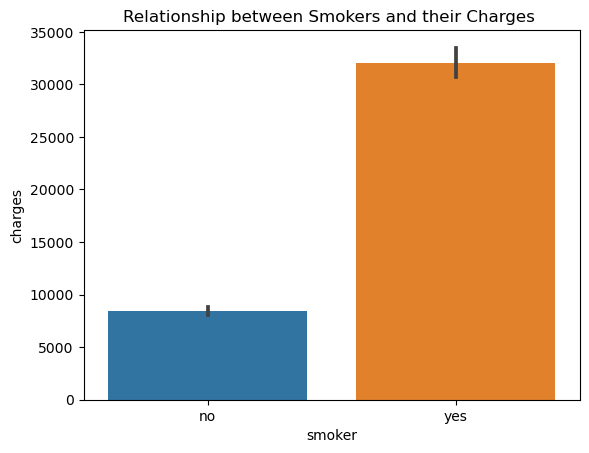

In [26]:
sns.barplot(data=insurance, x='smoker', y='charges')
plt.title('Relationship between Smokers and their Charges ');

### Question 6(What is the impact of Children who got medical insurance bills and region of persons who got medical insurance bills on their Charges?)

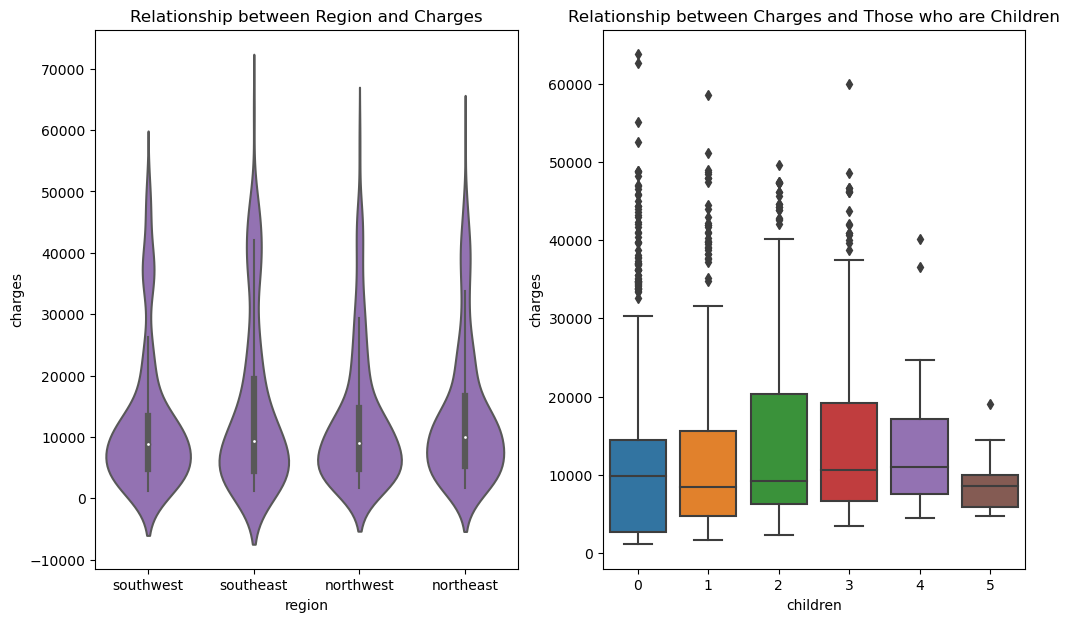

In [27]:
plt.figure(figsize=[12,7])

plt.subplot(1,2,1)
sns.violinplot(data=insurance, x='region', y='charges', color=base_color)
plt.title('Relationship between Region and Charges')

plt.subplot(1,2,2)
sns.boxplot(data=insurance, x='children', y='charges')
plt.title('Relationship between Charges and Those who are Children');

## Which of the Persons that got the medical bills and smokers have the highest average Charges

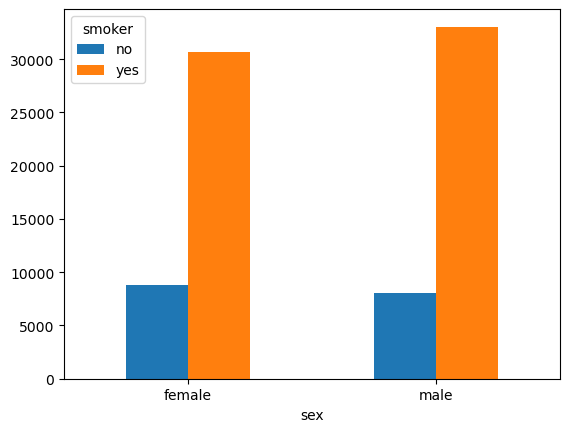

In [28]:
insurance.pivot_table(index='sex', columns='smoker', values='charges', aggfunc='mean').plot(kind='bar')
plt.xticks(rotation=0);

<a id="Con"></a>
## Conclusions

<a id='Rec'></a>
## Recommendations

<a id='Ref'></a>
## References